# Data Investigation on Titanic
### Report Outline 
 1. Introduction
 2. Proposed Questions
 3. Data Wrangling 
 4. Data Exploration 
 5. Conclusion
 6. Reference Links

### 1. Introduction 

- The Titanic Dataset is selected to perform the investigation from Kaggle. 
- The structure of this report is basically following the Udacity rubric. 
- The questions are proposed in Proposed Question (section 2). 
- The file-io, cleanning missing value, and ..etc are addressed in Data Wrangling(section 3).
- The data exploration & hypothesis test with questions are discussed in Data Exploration(section 4).
- More exploration and data exploration is in (section 5)

### 2. Proposed Questions
- Which Age group had a better chance of survival ?
- Which Social class had a better chance of survival?
- Which Gender had a better chance of survival ?


### 3. Data Wrangling Phase
- This section mainly contains the code implementation with 
    - Handling csv file-io
    - Check the data quality with missing value
    - Select the targeted data
    - Drop the null value
    - Feature engineering(part-1) of assign the index to the Sex feature.
    - Feature engineering(part-2) of discretize the Age feature.
- The statistical explorations would be on the next section.
- According to the proposed questions, we are going to explore the dataset that contains Age, Social, Gender and Survival.

#### 3-1 Read the CSV File and Probe the Missing Value

In [1]:
# import data process tools
import numpy as np
import pandas as pd
from scipy import stats
from IPython.display import display 

# import visualization tools
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

###############
# CSV File IO #
###############

# read raw data from csv file
try :
    df_raw = pd.read_csv('titanic_data.csv')
except:
    print 'Missing file : [titanic_data.csv]'

# Inspect the column 
print '------------------------------------'
print '         Basic Information '  
print '------------------------------------'
display(df_raw.info())


#######################
# Missing Value Check #
#######################
print '-------------------------------------'
print '        Missing Values Counts ' 
print '-------------------------------------'
display(df_raw.isnull().sum())

------------------------------------
         Basic Information 
------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


None

-------------------------------------
        Missing Values Counts 
-------------------------------------


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

#### 3-2 Select the data related to proposed question and Drop the missing values

Based on the question, we select out column with Survived, Pclass, Sex and Age.
After droping missing values, there are 714 rows of the data.

In [2]:
###############
# Select Data #
###############

# According to the proposed question select related variables
select_vars = ['Survived','Pclass', 'Sex', 'Age']
    
# drop other variables/features 
df_select = df_raw.loc[:,select_vars]

# fill out NA 
df_dropna = df_select.dropna().reindex()

# display the target dataset 10 raws for visual-check
display(df_dropna.ix[:10,:])
print '------------------------------------------------------------'
print 'The raw data is with {} rows of records'.format(len(df_raw))
print 'The data we explore is with {} rows of records'.format(len(df_dropna))

,Survived,Pclass,Sex,Age
0,0,3,male,22.0
1,1,1,female,38.0
2,1,3,female,26.0
3,1,1,female,35.0
4,0,3,male,35.0
6,0,1,male,54.0
7,0,3,male,2.0
8,1,3,female,27.0
9,1,2,female,14.0
10,1,3,female,4.0


------------------------------------------------------------
The raw data is with 891 rows of records
The data we explore is with 714 rows of records


#### 3-3 Feature Process for each feature to be categorical data

##### 3-3-1 Feature Process on Sex
Since the Sex is contrian the str object, we endoded as male = 1 and female = 0

In [3]:
#########################
# Feature Engineering 1 #
#########################
# since the Sex is contrian the str object. 
# we endoded as male = 1 and female = 0

def numerize_Sex(x):
    if x=='male':
        return 1
    return 0

# Copy for manipulation 
df_numerize_Sex = df_dropna.copy()

# apply the function on the sex feature
df_numerize_Sex['Sex'] = df_numerize_Sex['Sex'].apply(numerize_Sex)

# Visualize # display the target dataset 5 raws for visual-check
print ('Change Sex feature into 0 and 1 ')
display(df_numerize_Sex.ix[:5,:])



Change Sex feature into 0 and 1 


,Survived,Pclass,Sex,Age
0,0,3,1,22.0
1,1,1,0,38.0
2,1,3,0,26.0
3,1,1,0,35.0
4,0,3,1,35.0


##### 3-3-2 Feature Process on Age
We also notice that Age features seems to be continuous.
We first visualize it with histogram with different bins numbers.
Then we decided the interval to descretize the Age data in to catagorical data.

Histogram of Age (Bins=5) 


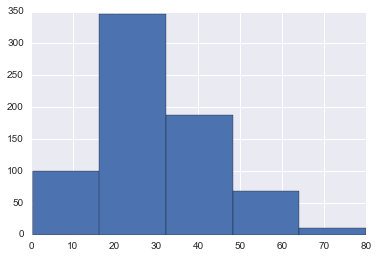

In [4]:
print ('Histogram of Age (Bins=5) ')
df_numerize_Sex['Age'].hist(bins=5)


Histogram of Age (Bins=8) 


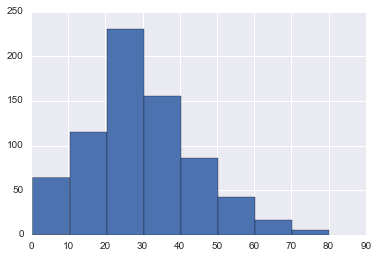

In [5]:
print ('Histogram of Age (Bins=8) ')
df_numerize_Sex['Age'].hist(bins=8)


###### Decide the interval 
We could see from the histogram that the best interval for bin-size might be about 9~11.
Here we chose the folling setting : 
- 0~10   => 0
- 11~20 => 1
- 21~30 => 2
- 31~40 => 3
- .... etc 


In [8]:
#########################
# Feature Engineering 2 #
#########################
# We also notice that Age features seems to be continuous, 
# We could decretize it into the categorical features 
# by with the help of histogram and bin-size


# Copy previous dataframe for manipulation 
df_feature2 = df_numerize_Sex.copy()

# Apply the lamba function for descretizaton
df_feature2['Age'] = df_feature2['Age'].apply(lambda x: int((x+1) /10.0))

print ('Change Age feature into 0 to 10 catagories')
display(df_feature2.ix[:5,:])


Change Age feature into 0 to 10 catagories


,Survived,Pclass,Sex,Age
0,0,3,1,2
1,1,1,0,3
2,1,3,0,2
3,1,1,0,3
4,0,3,1,3


### 4. Data Exploration with Hypothesis Test
- In this section, we are going to first explore the basic information about the target dataset. Then we are going to use the hypothesis test to judge whether the Age, Social-class or Gender would contributed to Survials or not.

##### [-] The Reason of Chosing Chi-square method to do the test

- Since our data is Categorical rather than Numerical, which is aslo considered as non-parametric, we chose the Chi-square of independent test to check 2 varibles are dependent or independent. 

- The Chi-square test of independence assesses whether unpaired observations on two variables, expressed in a contingency table, are independent of each other. 

- We have to also notice the limitations of chi-square during our testing process as following.

##### [-] The Chi-square limitations 

- The chi-square test does not give us much information about the strength of the relationship or its substantive significance in the population. 

- The chi-square test is sensitive to sample size. The size of the calculated chi-square is directly proportional to the size of the sample, independent of the strength of the relationship between the variables. The sensitivity of chi-square to sample size may make a weak relationship statistically significant if the sample is large enough. Therefore, we need to use tests of significance like chi-square together with measures of association like lambda, Cramer's V or gamma.

- The chi-square test is also sensitive to small expected frequencies in one or more of the cells in the table, which would cause bias problem. Since chi-square is sensitive to small expected frequencies in the cells, we have to be very cautious in interpreting chi-square if one or more cells are less than 5. As Frankfort-Nachmias and Leon-Guerrero note, "most researchers limit the use of chi-square to tables that either (1) have no fe values below 5 in value or (2) have no more than 20 percent of the fe values below 5 in value."

##### [-] Set the Alpha level 

- Here we set the Alpha-level as 0.05. If the p-value is larger than alpha-level, we fail to reject the null-hypothesis. However it does not mean we accept it, just the data is not enough to reject it. On the other hand, if the p-value is smaller than alpha-level, we would able to reject the null-hypothesis. 

- In general, the lager degree-of-freedom of the variables, the less skewness of the chi-distribution, and thus it would be harder to reject the null hypothesis because the we would need a higher chi-static score.    




#### 4-1: Which Age group had a better chance of survival ? 

##### [-] 4-1-1 : Hypothesis test 
- Ho (null) : Age and Survials are independent.
- Ha (alternative) : Age and Survials are dependent.

In [9]:
from scipy.stats import chi2_contingency
from statsmodels.graphics.mosaicplot import mosaic

def chi_test(df, colName):
    assert type(colName)==str
    
    # create contengency table 
    df_analyse = pd.crosstab(df[colName], df['Survived']).T
    
    # Visulizatoin 
    display(df_analyse)
    
    # Use chi2_contingency test of independent 
    chi2, p, dof, expected = chi2_contingency(df_analyse)
    print 'P-value : [{}] for {} vs Survived'.format(round(p,5),colName)
    
def visualize_survival_rate(df, x_col):
    sns.barplot(x=x_col, y='Survived',errwidth =0, data=df);

def visualize_mosaic(df, x_col):
    mosaic(df, [x_col, 'Survived'], axes_label=True)
    
# Do the Chi-Test
chi_test(df_feature2, 'Age')


Age,0,1,2,3,4,5,6,7,8
Survived,,,,,,,,,
0,18,51,147,97,62,28,15,6,0
1,36,34,78,76,35,24,6,0,1


P-value : [0.00055] for Age vs Survived


###### Test result
- Accordinig to the following Chi-square of independent test, the p-value is less than 0.05. 
- We could reject the null hypothesis.

##### [-] 4-1-2 : Discussion and Visualization of survival rate.

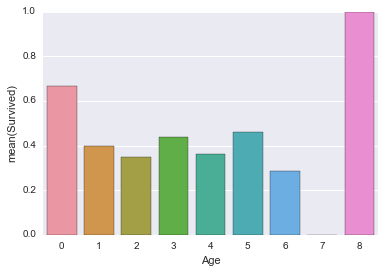

In [13]:
# Visaulization 
visualize_survival_rate(df_feature2,'Age' )


##### Visulization result
Base on the graph, it could be seen that the age-group in the 80~90 is more likely to survived. However, we also notice that the sample size in this age-group is really small. It is likely a highly biased result.



#### 4-2 : Which Social class had a better chance of survival? 

##### [-] 4-2-1 : Hypothesis test 
- Ho : Social(Pclass) and Survials are independent.
- Ha : They are dependent.

In [14]:
chi_test(df_feature2, 'Pclass')

Pclass,1,2,3
Survived,,,
0,64,90,270
1,122,83,85


P-value : [0.0] for Pclass vs Survived


###### Test result
- Accordinig to the following Chi-square of independent test, the p-value is less than 0.05. 
- We could reject the null hypothesis.

##### [-] 4-2-2 : Discussion and Visualization of survival rate.

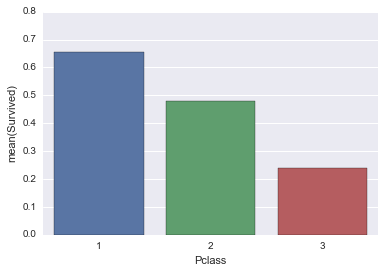

In [12]:
# Visaulization Bar Chart 
visualize_survival_rate(df_feature2,'Pclass' )


##### Visulization result
Base on the graph, it could be seen that the Pclass-1 is more likely to survive.

#### 4-3 :  Which Gender had a better chance of survival ? 

##### [-] 4-3-1 : Hypothesis test 
- Ho : Gender(Sex) and Survials are independent.
- Ha : They are dependent. 

In [15]:
chi_test(df_feature2, 'Sex')

Sex,0,1
Survived,,
0,64,360
1,197,93


P-value : [0.0] for Sex vs Survived


###### Test result
- Accordinig to the following Chi-square of independent test, the p-value is less than 0.05. 
- We could reject the null hypothesis.

##### [-] 4-3-2 : Discussion and Visualization of survival rate.
- Here we also add mosaic plot for another angle for visualization.
- The function is defined at the beginning of section 4.

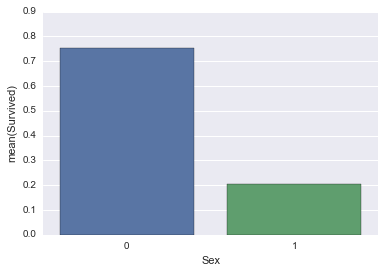

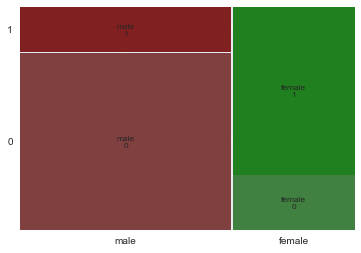

In [16]:
visualize_survival_rate(df_feature2, 'Sex')

visualize_mosaic(df_dropna,'Sex')

##### Visulization result
Base on the graph, it could be seen that the Sex-0(Female) is more likely to survive.

### 5. Conclusion


#### 5-1 : Dataset limitations

There are several limitation of the Titanic dataset we used in this report. 
It might lead a biased or skewed result. 

##### [-] Main limitation 1: Missing data

For example, there are different propotion of missing age in Female group and Male group. When we drop the missing value, we basically drop the different propotoin of Female and Male data. It the defference of the propotion is large, we would bias or skew the results on Male and Female. This condition is the same as it in other variable like Pclass.

##### [-] Main limitation 2: The size of sample data and how we collect the data

The size of the sample data could also impact the results as we don't know if this is a random sample or if the selection of the data is biased or unbiased.

Recall the chi-squre limitation in Section 4 : The chi-square test is sensitive to sample size. The size of the calculated chi-square is directly proportional to the size of the sample, independent of the strength of the relationship between the variables. The sensitivity of chi-square to sample size may make a weak relationship statistically significant if the sample is large enough. 

#### 5-2 : Future : Improve the analysis

##### [-] More hidden correlation mining. 
- In this report, we are only explore the correlation of Age vs Survived, Pclss vs Survived and Sex vs Survived. It would be also helpful for we to discover the correlation such as Age vs Pclass, Age vs Ticket, Age vs Sex ... etc

##### [-] Collect more data
- In this report, we basically use 714 rows of data. If we could have more data, it helps us to more likely to discover more correlation.

##### [-] Expand the demensionality (collect more variables) 
- It might be helpful to have the feature such as weight, height ...etc. 

#### 5-3 : Summary 
In this report, we found that each of Age, Sex, and Pclass are dependent to survive rate. However it is not telling any causility. We shold also consider the effect of the limitation from the data. Finally, we also proposed potential ways to further improve the analsis.


### 6. Reference

- https://www.kaggle.com/omarelgabry/titanic/a-journey-through-titanic
- https://www.kaggle.com/mrisdal/titanic/exploring-survival-on-the-titanic
- https://www.kaggle.io/svf/198371/166ea2e9c1074ca9cd2447c7ee27cf10/__results__.html#load-and-check-data
- http://stanford.edu/~mwaskom/software/seaborn/tutorial/distributions.html#visualizing-pairwise-relationships-in-a-dataset
- https://en.wikipedia.org/wiki/Correlation_does_not_imply_causation#Causality_construed_from_counterfactual_states
- http://www.simafore.com/blog/bid/56480/2-key-assumptions-to-be-aware-of-before-applying-the-chi-square-test
- https://learn.bu.edu/bbcswebdav/pid-826908-dt-content-rid-2073693_1/courses/13sprgmetcj702_ol/week05/metcj702_W05S02T05_limitations.html